# Trabajo Práctico 2 - Machine Learning
*Felicitas Marolda*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [2]:
import sys
sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
import models as mod
importlib.reload(mod)
import metrics as met
importlib.reload(met)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src\\preprocessing.py'>

In [3]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

In [4]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

print(cell_diagnosis_dev.describe())
# hacemos un pairplot para ver la distribucion de los datos
# sns.pairplot(cell_diagnosis_dev, hue='CellType', palette='husl')  
# plt.title('Pairplot of Cell Diagnosis Dataset')
# plt.show()

# sns.pairplot(cell_diagnosis_dev_imbalanced, hue='CellType', palette='rocket')
# plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
# plt.show()

      CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
689  68.260880        NaN             NaN               NaN      27.658034   
728  65.629408   0.519270        1.455704         22.211149      26.390708   
793  68.513972   0.490549        1.521498         20.104809      24.572717   
263  66.889802   0.462077        1.474197         22.193555      25.538501   
622  66.970359   0.558031             NaN         21.342274      25.322314   

     CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
689      0.472508     3.300826         2.494515     57.936947   
728      0.502045     3.320073         2.648905     58.958772   
793      0.457404     3.566082         2.528572     60.183418   
263      0.473796     3.427871         2.541369     56.258879   
622      0.456088     3.514659         2.434481           NaN   

     OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
689         81.644015         5.019497                  NaN       

In [5]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

importlib.reload(pp)
importlib.reload(mod)

new_df_dev = pp.prepare_df(cell_diagnosis_dev)
# new_df_dev_imbalanced = pp.prepare_df(cell_diagnosis_dev_imbalanced)


Index(['Epthlial', '???', 'Mesnchymal'], dtype='object')
          CellSize    CellShape  NucleusDensity  ChromatinTexture  \
count  1663.000000  1663.000000     1663.000000       1663.000000   
mean     83.247087     0.598657        2.097344         26.094973   
std      89.806945     0.508852        4.513389         22.513350   
min    -100.000000    -1.413038       -3.000000         10.000000   
25%      67.314449     0.484957        1.405752         21.481689   
50%      71.043484     0.509618        1.463867         22.368306   
75%      76.531205     0.555785        1.528006         23.830798   
max    1000.000000     5.048566       50.000000        263.793425   

       CytoplasmSize  CellAdhesion  MitosisRate  NuclearMembrane  \
count    1663.000000   1663.000000  1663.000000      1663.000000   
mean       33.989815      0.548800     5.326484         2.825365   
std        29.526251      0.555448    10.398873         2.424351   
min         5.000000     -4.461755   -50.000000  

### Ejercicio 1.2
Implementar una clase de regresión logística binaria con regularización L2. Utilizando el conjunto de datos de desarrollo cell_diagnosis_balanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar el modelo sobre el conjunto de entrenamiento y evaluar su desempeño sobre el conjunto de validación.

Reportar las siguientes métricas de performance:
– Matriz de confusión
– Accuracy
– Precision
– Recall
– F-Score
– Curva Precision-Recall (PR)
– Curva ROC
– AUC-ROC
– AUC-PR

Para ajustar el hiperparámetro de regularización λ, puede utilizar F-Score como métrica de performance.

**NOTA**: Si el modelo se implementa de forma general para clasificación multiclase, el mismo código podrá ser reutilizado en el ejercicio 2.

In [6]:
# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data, val_data = pp.split_data(new_df_dev, 0.2)
print("train_data shape: ", train_data.shape)
print("val_data shape: ", val_data.shape)
# train_X, train_y, features = pp.df_breakDown(train_data, 'Diagnosis')
# val_X, val_y, _ = pp.df_breakDown(val_data, 'Diagnosis')

# print("train_X shape: ", train_X.shape)
# print("train: ", train_X[0])


train_data shape:  (1330, 15)
val_data shape:  (333, 15)


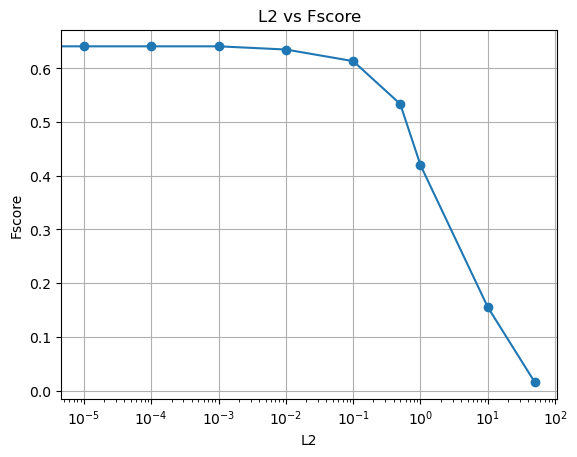

Best L2:  0


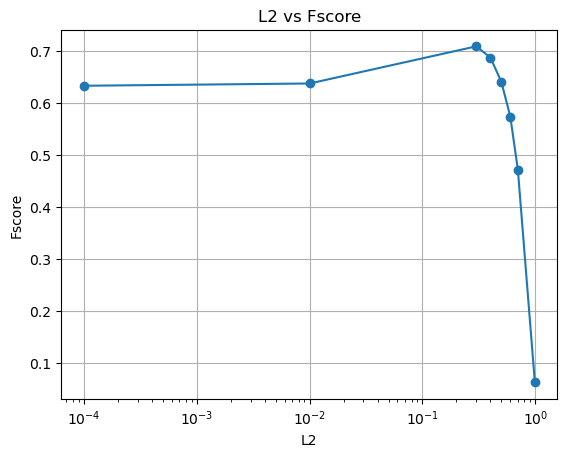

Best threshold:  0.3


In [20]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)
# entrenamos el modelo
possible_L2 = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
possible_threshold = [0.0001, 0.01, 0.3, 0.4, 0.5, 0.6, 0.7, 0.99]

best_L2 = pp.cross_validation_for_L2(train_data, possible_L2)
print("Best L2: ", best_L2)

best_threshold = pp.cross_validation_for_threshold(train_data, best_L2, possible_threshold)
print("Best threshold: ", best_threshold)
#normalizamos X
# train_X = pp.min_max_scaling(train_X, train_X.min(), train_X.max())
# model = mod.Logistic_Regression(train_X, train_y, features)

In [22]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)

X_train, y_train, features = pp.df_breakDown(train_data, y='Diagnosis')
X_val, y_val, _ = pp.df_breakDown(val_data, y='Diagnosis')

# print("Distribución de Diagnosis en train:")
# print(X_train_fold['Diagnosis'].value_counts())

X_train = pp.normalization(X_train, X_train.mean(), X_train.std())
X_val = pp.normalization(X_val, X_train.mean(), X_train.std())

model = mod.Logistic_Regression(X_train, y_train, features, best_L2, 0.5)
model_val = model.predict(X_val)
print(model.coef)

[-0.04052583  0.02253331  0.04722345  0.03842065 -0.08748596  0.2306535
  0.04108243 -0.07264107  0.0078897   0.13802547  0.02282456  0.02171001
 -0.41735594  0.04127947  0.04418202]


Fscore:  0.7424242424242424
Precision:  0.7538461538461538
Recall:  0.7313432835820896
Accuracy:  0.7957957957957958


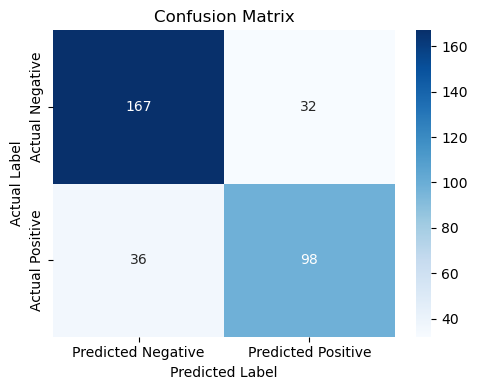

AUC-ROC:  -0.7264681617040426


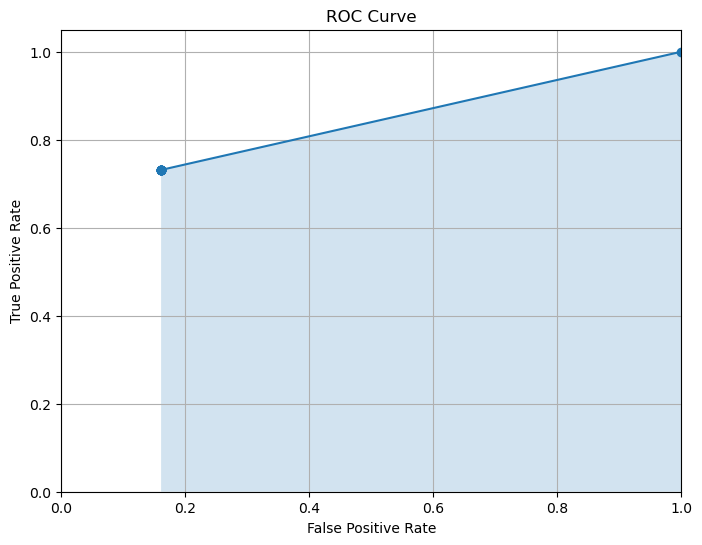

In [24]:
importlib.reload(met)

print("Fscore: ", met.f_score(y_val, model_val))
print("Precision: ", met.precision(y_val, model_val))
print("Recall: ", met.recall(y_val, model_val))
print("Accuracy: ", met.accuracy(y_val, model_val))
TP, TN, FP, FN = met.confusion_matrix(y_val, model_val)
# print("TP: ", TP, "\nTN: ", TN, "\nFP: ", FP, "\nFN: ", FN)
met.draw_confusion_matrix(TP, TN, FP, FN)
print("AUC-ROC: ", met.AUC_ROC(y_val, model_val))
met.draw_AUC_ROC(y_val, model_val)
# print("AUC-PR: ", met.AUC_PR(y_val, model_val))
# print("curve ROC: ", met.curve_ROC(y_val, model_val))
# met.draw_ROC_curve(y_val, model_val)
# print("curve precision recall: ", met.curve_precision_recall(y_val, model_val))
# met.draw_precision_recall_curve(y_val, model_val)